In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def exp_pdf(x, lmbd=0.5):
    return lmbd * np.exp(-lmbd * x)

In [5]:
class Queue:
    def __init__(self, T=1000, Tdelta=1, lmbd=0.5):
        self.t = np.arange(0, T, Tdelta)
        self.y = np.zeros(len(self.t))
        self.lmbd = lmbd
            
    def run(self, dump=False, dump_prob=0.99):
        for i in range(1, len(self.t)):
            up = int(np.random.rand() > self.lmbd)
            
            if dump and np.random.rand() > dump_prob:
                self.y[i] = 0
            else:
                self.y[i] = self.y[i - 1] + up
                
    
    def plot_queue(self):
        plt.plot(self.t, self.y)
        plt.xlabel('t [-]')
        plt.ylabel('Q [-]')
        plt.title('Queue Length')
        plt.show()
        
    def hist_time_gaps(self):
        gaps = np.diff(self.t[np.append([True], np.diff(self.y) > 0)])
        bins = plt.hist(gaps, edgecolor='black', bins=10)
        
        x = np.arange(1, 10, 0.1)
        y = exp_pdf(x, self.lmbd)
        
        scale = bins[0][0] / y[0]
        plt.plot(x, y * scale, color='r')
        
        plt.xlabel('time gap [time_step]')
        plt.ylabel('count [-]')
        plt.title('Time Gap Histogram')
        plt.show()

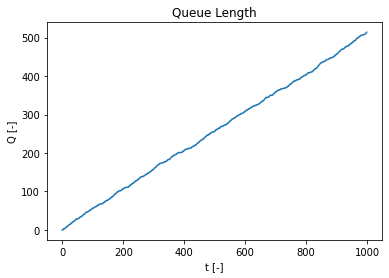

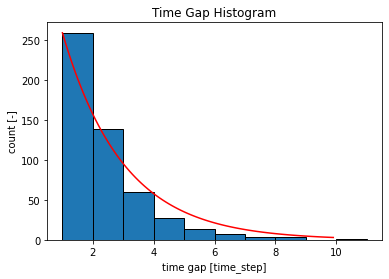

In [25]:
Q = Queue(T=1000)
Q.run()
Q.plot_queue()
Q.hist_time_gaps()